# Setup

In [1]:
%pylab --no-import-all inline
import matplotlib as mpl

Populating the interactive namespace from numpy and matplotlib


Don't necessarily actually want the figures to be inline (not really necessary here as I really just want to save them)

In [19]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [2]:
import paratemp.coordinate_analysis as ca

from paratemp import cd
import pandas as pd

import os

import MDAnalysis
import MDAnalysis as mda

In [3]:
configs = {'MaEn': 'major-endo/13-3htmf-etc/05',
           'MaEx': 'major-exo/13-3htmf-etc/05',
           'MiEn': 'minor-endo/13-3htmf-etc/05',
           'MiEx': 'minor-exo/13-3htmf-etc/05'
          }

# Combined open/closed FESs

## Production

Now starting on MaEx 0...
Calculating oxygen distances...
This may take a few minutes.


/usr3/graduate/theavey/anaconda_envs/py2.7/lib/python2.7/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '754462'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


Saved data to npt-PT-MaEx-out0.h5[754462]
Now starting on MiEn 0...
Calculating oxygen distances...
This may take a few minutes.


/usr3/graduate/theavey/anaconda_envs/py2.7/lib/python2.7/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '776242'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


Saved data to npt-PT-MiEn-out0.h5[776242]
Now starting on MiEx 0...


/usr3/graduate/theavey/.local/lib/python2.7/site-packages/MDAnalysis/coordinates/XDR.py:126: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


Calculating oxygen distances...
This may take a few minutes.


/usr3/graduate/theavey/anaconda_envs/py2.7/lib/python2.7/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '773192'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


Saved data to npt-PT-MiEx-out0.h5[773192]
Now starting on MaEn 0...
Calculating oxygen distances...
This may take a few minutes.


/usr3/graduate/theavey/anaconda_envs/py2.7/lib/python2.7/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '775548'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)
/usr3/graduate/theavey/anaconda_envs/py2.7/lib/python2.7/site-packages/tables/path.py:112: NaturalNameWarning: object name is not a valid Python identifier: '750ns'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  NaturalNameWarning)


Saved data to npt-PT-MaEn-out0.h5[775548]
Now starting on MaEx 1...
Calculating oxygen distances...
This may take a few minutes.
Saved data to npt-PT-MaEx-out1.h5[754462]
Now starting on MiEn 1...
Calculating oxygen distances...
This may take a few minutes.
Saved data to npt-PT-MiEn-out1.h5[776242]
Now starting on MiEx 1...
Calculating oxygen distances...
This may take a few minutes.
Saved data to npt-PT-MiEx-out1.h5[773192]
Now starting on MaEn 1...
Calculating oxygen distances...
This may take a few minutes.
Saved data to npt-PT-MaEn-out1.h5[775548]
Now starting on MaEx 2...
Calculating oxygen distances...
This may take a few minutes.
Saved data to npt-PT-MaEx-out2.h5[754462]
Now starting on MiEn 2...
Calculating oxygen distances...
This may take a few minutes.
Saved data to npt-PT-MiEn-out2.h5[776242]
Now starting on MiEx 2...
Calculating oxygen distances...
This may take a few minutes.
Saved data to npt-PT-MiEx-out2.h5[773192]
Now starting on MaEn 2...
Calculating oxygen distances.

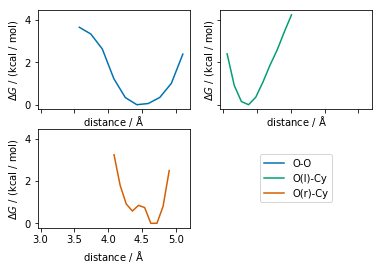

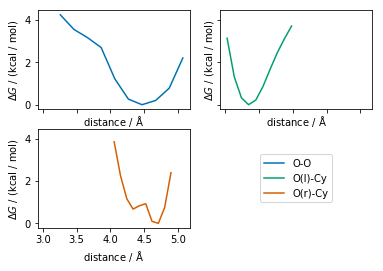

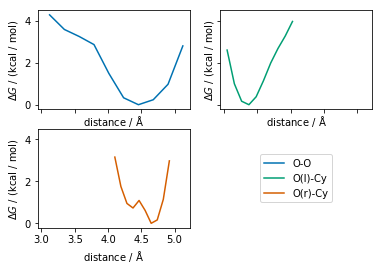

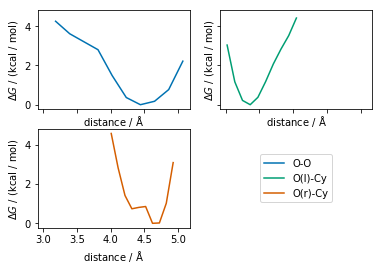

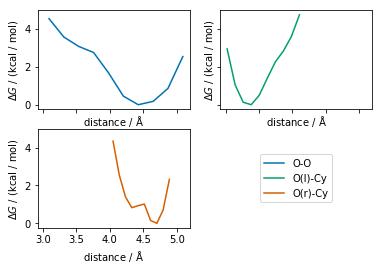

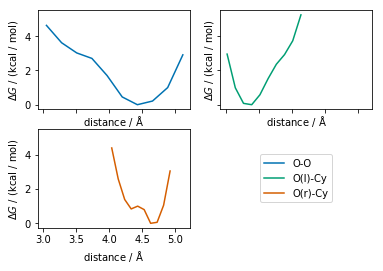

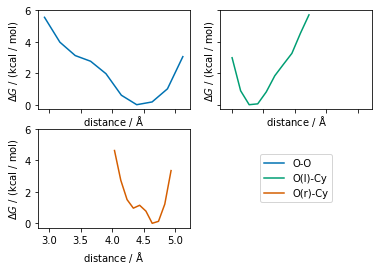

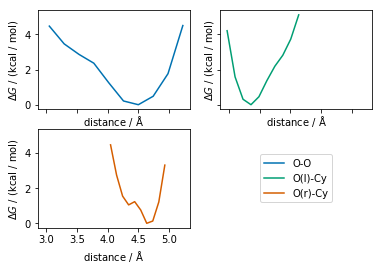

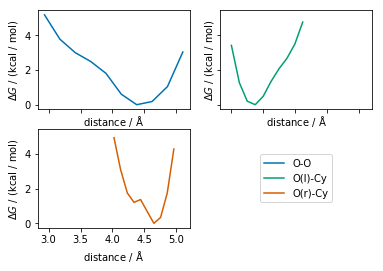

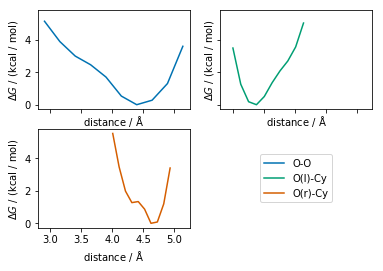

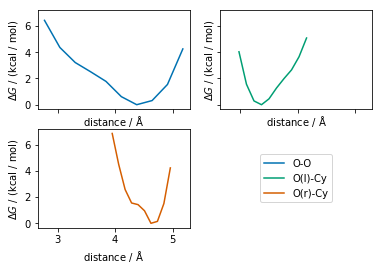

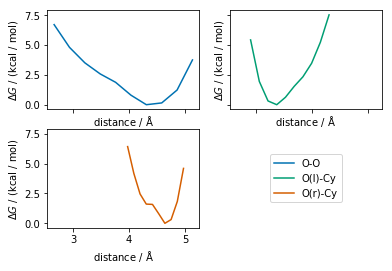

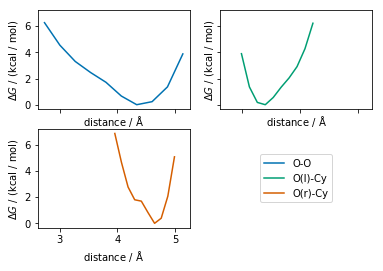

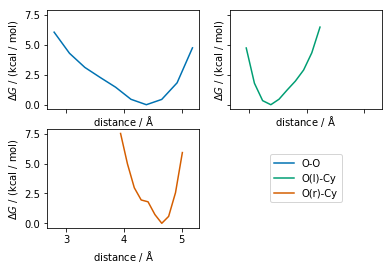

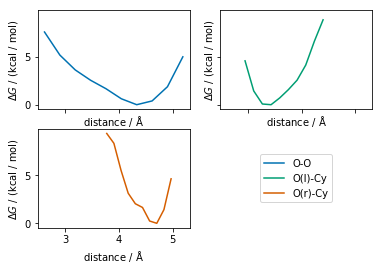

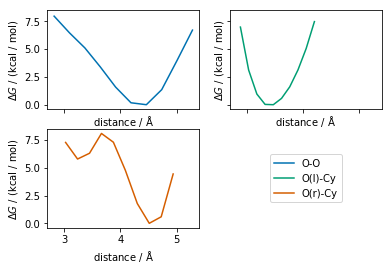

In [23]:
for i in xrange(16):
    comb_df = pd.DataFrame(columns=['O-O', 'O(l)-Cy', 'O(r)-Cy'])
    if os.path.exists('comb-o-data-{}.h5'.format(i)):
        with pd.HDFStore('comb-o-data-{}.h5'.format(i)) as store:
            try:
                comb_df = store['time_750ns']
            except KeyError:
                comb_df = store['750ns']
    else:
        for key in configs:
            with cd(configs[key]):
                with open('TOPO/temperatures.dat', 'r') as t_file:
                    temps = list(t_file.read()[1:-2].split(', '))
                temp = float(temps[i])
                print 'Now starting on {} {}...'.format(key, i)
                univ = ca.Taddol('../../../solutes.gro', 
                                 'npt-PT-{}-out{}.xtc'.format(key, i))
                try:
                    univ.read_data()
                except IOError:
                    save_data = True
                    pass
                else:
                    save_data = False
                comb_df = comb_df.append(univ.ox_dists, ignore_index=True)
                if save_data:
                    univ.save_data()
        with pd.HDFStore('comb-o-data-{}.h5'.format(i)) as store:
            store['time_750ns'] = comb_df
        print('Saved combined data as {}'.format('comb-o-data-{}.h5'.format(i)))
    fig = univ.fes_ox_dists(data=comb_df, temp=temp, linewidth=3)
    for axes in fig.axes[:3]:
        axes.set_ylim[0:8]
    fig.savefig('fes-ox-dists-rjm-PT-comb-{}.pdf'.format(i))
    plt.close('all')
    print('Saved figure as {}'.format('fes-ox-dists-rjm-PT-comb-{}.pdf'.format(i)))
    print('Done with temp {:.0f} K ({} of 16).'.format(temp, i+1) \
          ' Moving to next temperature...\n\n')

# Create final figures

## Production

In [183]:
overwrite = True

for key in configs:
    with cd(configs[key]):
        with open('TOPO/temperatures.dat', 'r') as t_file:
            temps = list(t_file.read()[1:-2].split(', '))
        univ = ca.Taddol('../../../solutes.gro', 
                         'npt-PT-{}-out{}.xtc'.format(key, '0'))
        final_time = int(univ.data['Time'].iat[-1]/1000)
        if final_time >= 1000:
            final_time = str(final_time/1000)+'us'
        else:
            final_time = str(final_time) + 'ns'
        if os.path.isfile('fes-ox-dists-rjm-PT-{}-comb-{}.pdf'.format(key, final_time)) or not overwrite:
            print('\nAll of {} seems to be complete, moving on to next config...\n\n'.format(key))
            continue
        fig_fes_cvs, axes_fes_cvs = plt.subplots(4, 4, sharex=True, sharey=True)
        fig_fes_cvs_open, axes_fes_cvs_open = plt.subplots(4, 4, sharex=True, sharey=True)
        fig_fes_cvs_closed, axes_fes_cvs_closed = plt.subplots(4, 4, sharex=True, sharey=True)
        fig_fes_ox_dists, axes_fes_ox_dists = plt.subplots(8, 8, sharex=True, sharey=True)
        for i in xrange(16):
            print 'Now starting on {} {}...'.format(key, i)
            temp = float(temps[i])
            univ = ca.Taddol('../../../solutes.gro', 
                             'npt-PT-{}-out{}.xtc'.format(key, i))
            final_time = str(int(univ.data['Time'].iat[-1]/1000))+'ns'
            file_name_end = '-rjm-PT-{}-{}-{}.pdf'.format(key, i, final_time)
            try:
                univ.read_data()
            except IOError:
                univ.calculate_distances()
                univ.save_data()
            univ.calc_open_closed()  # This is fast, so doesn't really matter if repeated
            print 'Done importing and calculating, making figures...'
            
            ax = axes_fes_cvs.flat[i]
            univ.fes_2d_cvs(temp=temp, display=False, ax=ax)
            filename = 'fes-cvs'+file_name_end
            if (not os.path.isfile(filename)) or overwrite:
                fig = univ.fes_2d_cvs(temp=temp)
                fig.savefig(filename)
            
            if len(univ.data[univ.data['open_TAD']]['CV1']) > 1:
                ax = axes_fes_cvs_open.flat[i]
                univ.fes_2d_cvs(univ.data[univ.data['open_TAD']]['CV1'], 
                                univ.data[univ.data['open_TAD']]['CV2'],
                                temp=temp, display=False, ax=ax)
                filename = 'fes-cvs-open'+file_name_end
                if (not os.path.isfile(filename)) or overwrite:
                    fig = univ.fes_2d_cvs(univ.data[univ.data['open_TAD']]['CV1'], 
                                          univ.data[univ.data['open_TAD']]['CV2'],
                                          temp=temp)
                    fig.savefig(filename)
            else:
                print '\n\n!!!! Not enough data to plot for open ' \
                      '{} {} !!!!\n\n'.format(key, i)
            
            if len(univ.data[univ.data['closed_TAD']]['CV1']) > 1:
                ax = axes_fes_cvs_closed.flat[i]
                univ.fes_2d_cvs(univ.data[univ.data['closed_TAD']]['CV1'], 
                                univ.data[univ.data['closed_TAD']]['CV2'],
                                temp=temp, display=False, ax=ax)
                filename = 'fes-cvs-closed'+file_name_end
                if (not os.path.isfile(filename)) or overwrite:
                    fig = univ.fes_2d_cvs(univ.data[univ.data['closed_TAD']]['CV1'], 
                                          univ.data[univ.data['closed_TAD']]['CV2'],
                                          temp=temp)
                    fig.savefig(filename)
            else:
                print '\n\n!!!! Not enough data to plot for closed ' \
                      '{} {} !!!!\n\n'.format(key, i)
            
            axes = axes_fes_ox_dists.flat[4*i:4*i+4]
            univ.fes_ox_dists(temp=temp, save=False, display=False, linewidth=3,
                              axes=axes)
            filename = 'fes-ox-dists'+file_name_end
            if (not os.path.isfile(filename)) or overwrite:
                fig = univ.fes_ox_dists(temp=temp, save=False, display=True, 
                                        linewidth=3)
                fig.savefig(filename)
            print('Done making and saving figures for '
                  '{} {}, closing and moving on...'.format(key, i))
        for axes in axes_fes_cvs[0:3]:
            for ax in axes:
                ax.set_xlabel('')
        for axes in axes_fes_cvs[:,1:]:
            for ax in axes:
                ax.set_ylabel('')
        fig_fes_cvs.tight_layout()
        for axes in axes_fes_cvs_open[0:3]:
            for ax in axes:
                ax.set_xlabel('')
        for axes in axes_fes_cvs_open[:,1:]:
            for ax in axes:
                ax.set_ylabel('')
        fig_fes_cvs_open.tight_layout()
        for axes in axes_fes_cvs_closed[0:3]:
            for ax in axes:
                ax.set_xlabel('')
        for axes in axes_fes_cvs_closed[:,1:]:
            for ax in axes:
                ax.set_ylabel('')
        fig_fes_cvs_closed.tight_layout()
        print '\n\n---Done with all {}, moving to next config'.format(key)
        plt.close('all')

Now starting on MaEx 0...
Done importing and calculating, making figures...
Using default data: self.ox_dists.
Using default data: self.ox_dists.
Done making and saving figures for MaEx 0, closing and moving on...
Now starting on MaEx 1...
Done importing and calculating, making figures...
Using default data: self.ox_dists.
Using default data: self.ox_dists.
Done making and saving figures for MaEx 1, closing and moving on...
Now starting on MaEx 2...
Done importing and calculating, making figures...
Using default data: self.ox_dists.
Using default data: self.ox_dists.
Done making and saving figures for MaEx 2, closing and moving on...
Now starting on MaEx 3...
Done importing and calculating, making figures...
Using default data: self.ox_dists.
Using default data: self.ox_dists.
Done making and saving figures for MaEx 3, closing and moving on...
Now starting on MaEx 4...
Done importing and calculating, making figures...
Using default data: self.ox_dists.
Using default data: self.ox_dists

Done importing and calculating, making figures...
Using default data: self.ox_dists.
Using default data: self.ox_dists.
Done making and saving figures for MiEx 5, closing and moving on...
Now starting on MiEx 6...
Done importing and calculating, making figures...
Using default data: self.ox_dists.
Using default data: self.ox_dists.
Done making and saving figures for MiEx 6, closing and moving on...
Now starting on MiEx 7...
Done importing and calculating, making figures...
Using default data: self.ox_dists.
Using default data: self.ox_dists.
Done making and saving figures for MiEx 7, closing and moving on...
Now starting on MiEx 8...
Done importing and calculating, making figures...
Using default data: self.ox_dists.
Using default data: self.ox_dists.
Done making and saving figures for MiEx 8, closing and moving on...
Now starting on MiEx 9...
Done importing and calculating, making figures...
Using default data: self.ox_dists.
Using default data: self.ox_dists.
Done making and saving f

## Combined Ox FESs Production

In [23]:
for i in xrange(16):
    comb_df = pd.DataFrame(columns=['O-O', 'O(l)-Cy', 'O(r)-Cy'])
    if os.path.exists('comb-o-data-{}.h5'.format(i)):
        with pd.HDFStore('comb-o-data-{}.h5'.format(i)) as store:
            comb_df = store['time_1us']
    else:
        for key in configs:
            with cd(configs[key]):
                with open('TOPO/temperatures.dat', 'r') as t_file:
                    temps = list(t_file.read()[1:-2].split(', '))
                temp = float(temps[i])
                print 'Now starting on {} {}...'.format(key, i)
                univ = ca.Taddol('../../../solutes.gro', 
                                 'npt-PT-{}-out{}.xtc'.format(key, i))
                try:
                    univ.read_data()
                except IOError:
                    save_data = True
                    pass
                else:
                    save_data = False
                comb_df = comb_df.append(univ.ox_dists, ignore_index=True)
                if save_data:
                    univ.save_data()
        with pd.HDFStore('comb-o-data-{}.h5'.format(i)) as store:
            store['time_1us'] = comb_df
        print('Saved combined data as {}'.format('comb-o-data-{}.h5'.format(i)))
    fig = univ.fes_ox_dists(data=comb_df, temp=temp, linewidth=3)
    for axes in fig.axes[:3]:
        axes.set_ylim([0,8])
    fig.savefig('fes-ox-dists-rjm-PT-comb-{}.pdf'.format(i))
    plt.close('all')
    print('Saved figure as {}'.format('fes-ox-dists-rjm-PT-comb-{}.pdf'.format(i)))
    print('Done with temp {:.0f} K ({} of 16).'.format(temp, i+1) +
          ' Moving to next temperature...\n\n')

Saved figure as fes-ox-dists-rjm-PT-comb-0.pdf
Done with temp 205 K (1 of 16). Moving to next temperature...


Now starting on MaEx 1...
Now starting on MiEn 1...
Now starting on MiEx 1...
Now starting on MaEn 1...
Saved combined data as comb-o-data-1.h5
Saved figure as fes-ox-dists-rjm-PT-comb-1.pdf
Done with temp 216 K (2 of 16). Moving to next temperature...


Now starting on MaEx 2...
Now starting on MiEn 2...
Now starting on MiEx 2...
Now starting on MaEn 2...
Saved combined data as comb-o-data-2.h5
Saved figure as fes-ox-dists-rjm-PT-comb-2.pdf
Done with temp 227 K (3 of 16). Moving to next temperature...


Now starting on MaEx 3...
Now starting on MiEn 3...
Now starting on MiEx 3...
Now starting on MaEn 3...
Saved combined data as comb-o-data-3.h5
Saved figure as fes-ox-dists-rjm-PT-comb-3.pdf
Done with temp 238 K (4 of 16). Moving to next temperature...


Now starting on MaEx 4...
Now starting on MiEn 4...
Now starting on MiEx 4...
Now starting on MaEn 4...
Saved combined data 

# CV Cut Plots

## Production

In [139]:
r = 0.0019872  # kcal_th/(K mol)

for key in configs:
    with cd(configs[key]):
        i = 0
        print 'Now starting on {} {}...'.format(key, i)
        univ = ca.Taddol('../../../solutes.gro', 
                         'npt-PT-{}-out{}.xtc'.format(key, i))
        temp = 205
        final_time = int(univ.data['Time'].iat[-1]/1000)
        if final_time > 1000:
            final_time = str(final_time/1000)+'us'
        else:
            final_time = str(final_time) + 'ns'
        file_name_end = '-rjm-PT-{}-{}-{}.pdf'.format(key, i, final_time)
        try:
            univ.read_data()
        except IOError:
            univ.calculate_distances()
            univ.calc_open_closed()
            univ.save_data()
        univ.calc_open_closed()

        x = univ.data.loc[lambda x: (2.5 < x.CV2) & (x.CV2 < 3.5) & x.closed_TAD]['CV1']
        if len(x) > 2:
            n, bins = np.histogram(x, bins=20)
            n = [float(j) for j in n]
            prob = np.array([j / max(n) for j in n]) + 1e-40
            delta_g = np.array([-r * temp * np.log(p) for p in prob])
            delta_g
            fig, ax = plt.subplots()
            line, = ax.plot(bins[:-1], delta_g)
            ax.set_ylabel(r'$\Delta G$ / (kcal / mol)')
            ax.set_xlabel(r'CV 1 / $\mathrm{\AA}$')
            fig.tight_layout()
            fig.savefig('fes-CV1-closed-shortCV2'+file_name_end)
        else:
            print('Not enough closed frames for {} {}'.format(key, i))
            
        x = univ.data.loc[lambda x: (7.5 < x.CV2) & (x.CV2 < 8.5) & x.open_TAD]['CV1']
        if len(x) > 2:
            n, bins = np.histogram(x, bins=20)
            n = [float(j) for j in n]
            prob = np.array([j / max(n) for j in n]) + 1e-40
            delta_g = np.array([-r * temp * np.log(p) for p in prob])
            delta_g
            fig, ax = plt.subplots()
            line, = ax.plot(bins[:-1], delta_g)
            ax.set_ylabel(r'$\Delta G$ / (kcal / mol)')
            ax.set_xlabel(r'CV 1 / $\mathrm{\AA}$')
            fig.tight_layout()
            fig.savefig('fes-CV1-open-longCV2'+file_name_end)
        else:
            print('Not enough open frames for {} {}'.format(key, i))

Now starting on MaEx 0...
Not enough closed frames for MaEx 0
Now starting on MiEn 0...
Not enough closed frames for MiEn 0
Now starting on MiEx 0...
Not enough closed frames for MiEx 0
Now starting on MaEn 0...
Not enough closed frames for MaEn 0


# Select geoms from minima

## Production

In [25]:
cv1_cuts = [6.5, 9.]
cv2_cuts = [1.5, 3.]
name_set = 'lCV1-sCV2'

univ = ca.Taddol('solutes.gro', 'major-endo/13-3htmf-etc/05/pbc-MaEn-0.xtc')
try:
    univ.data['CV1']
except KeyError:
    univ.read_data(filename='major-endo/13-3htmf-etc/05/npt-PT-MaEn-out0.h5')

bool_array = ((univ.data['CV1'] > cv1_cuts[0]) & (univ.data['CV1'] < cv1_cuts[1]) 
              & (univ.data['CV2'] > cv2_cuts[0]) & (univ.data['CV2'] < cv2_cuts[1]))
num = len(univ.data[bool_array])
print('These cutoffs include {} frames.'.format(num))

solutes = univ.select_atoms('resname is 3HT or resname is CIN or resname is TAD')

with mda.Writer('minim-structs-'+name_set+'-rjm-PT-MaEn-0.xtc', 
                solutes.n_atoms) as W:
    for ts in univ.trajectory:
        if bool_array[univ.trajectory.frame]:
            W.write(solutes)

These cutoffs include 85723 frames.


In [23]:
cv1_cuts = [1.5, 4.]
cv2_cuts = [6.75, 8.5]
name_set = 'sCV1-lCV2'

univ = ca.Taddol('solutes.gro', 'major-endo/13-3htmf-etc/05/pbc-MaEn-0.xtc')
try:
    univ.data['CV1']
except KeyError:
    univ.read_data(filename='major-endo/13-3htmf-etc/05/npt-PT-MaEn-out0.h5')

bool_array = ((univ.data['CV1'] > cv1_cuts[0]) & (univ.data['CV1'] < cv1_cuts[1]) 
              & (univ.data['CV2'] > cv2_cuts[0]) & (univ.data['CV2'] < cv2_cuts[1]))
num = len(univ.data[bool_array])
print('These cutoffs include {} frames.'.format(num))

solutes = univ.select_atoms('resname is 3HT or resname is CIN or resname is TAD')

with mda.Writer('minim-structs-'+name_set+'-rjm-PT-MaEn-0.xtc', 
                solutes.n_atoms) as W:
    for ts in univ.trajectory:
        if bool_array[univ.trajectory.frame]:
            W.write(solutes)

These cutoffs include 65794 frames.


In [27]:
cv1_cuts = [1.5, 4.]
cv2_cuts = [6.75, 8.5]
name_set = 'sCV1-lCV2'

univ = ca.Taddol('solutes.gro', 'major-exo/13-3htmf-etc/05/pbc-MaEx-0.xtc')
try:
    univ.data['CV1']
except KeyError:
    univ.read_data(filename='major-exo/13-3htmf-etc/05/npt-PT-MaEx-out0.h5')

bool_array = ((univ.data['CV1'] > cv1_cuts[0]) & (univ.data['CV1'] < cv1_cuts[1]) 
              & (univ.data['CV2'] > cv2_cuts[0]) & (univ.data['CV2'] < cv2_cuts[1]))
num = len(univ.data[bool_array])
print('These cutoffs include {} frames.'.format(num))

solutes = univ.select_atoms('resname is 3HT or resname is CIN or resname is TAD')

with mda.Writer('minim-structs-'+name_set+'-rjm-PT-MaEx-0.xtc', 
                solutes.n_atoms) as W:
    for ts in univ.trajectory:
        if bool_array[univ.trajectory.frame]:
            W.write(solutes)

These cutoffs include 54987 frames.


In [28]:
cv1_cuts = [6.5, 9.]
cv2_cuts = [1.5, 3.]
name_set = 'lCV1-sCV2'

univ = ca.Taddol('solutes.gro', 'major-exo/13-3htmf-etc/05/pbc-MaEx-0.xtc')
try:
    univ.data['CV1']
except KeyError:
    univ.read_data(filename='major-exo/13-3htmf-etc/05/npt-PT-MaEx-out0.h5')

bool_array = ((univ.data['CV1'] > cv1_cuts[0]) & (univ.data['CV1'] < cv1_cuts[1]) 
              & (univ.data['CV2'] > cv2_cuts[0]) & (univ.data['CV2'] < cv2_cuts[1]))
num = len(univ.data[bool_array])
print('These cutoffs include {} frames.'.format(num))

solutes = univ.select_atoms('resname is 3HT or resname is CIN or resname is TAD')

with mda.Writer('minim-structs-'+name_set+'-rjm-PT-MaEx-0.xtc', 
                solutes.n_atoms) as W:
    for ts in univ.trajectory:
        if bool_array[univ.trajectory.frame]:
            W.write(solutes)
            

These cutoffs include 133980 frames.
